# Scale-free structure in BNNs 
We analyze degree distributions of the following connectomes and show they are not scale free

* C. elegans (last stage) of Witvliet et al: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8756380/
* Drosophila larva of Winding et al., 2023 https://www.science.org/doi/10.1126/science.add9330
* MICrONS data set of the IARPA MICrONS mm^3 dataset https://www.microns-explorer.org/cortical-mm3
* The V5 version of the Blue Brain Project model of https://www.cell.com/fulltext/S0092-8674(15)01191-5

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys 
sys.path.append('../../../library')
from structural_basic import load_connectome
from connalysis.network import topology

In [2]:
# Get connectivity object neighborhoods
conn_dir="/gpfs/bbp.cscs.ch/home/egassant/reliability_and_structure/data_analysis/data"
degs={}
for i,conn in enumerate(["Celegans", "Drosophila", "MICrONS", "BBP"]):
#for i,conn in enumerate(["Celegans"]):
    connectome = load_connectome(conn_dir, conn)
    degs[conn] = topology.node_degree(connectome.matrix.astype(bool), direction = ("IN", "OUT"))

Warning!!! When accessing the adjacency as a sparse matrix using the .matrix property:
    Connections that are not present at a given stage, but at other stages will be represented as edges,
    but with a value of ``0`` synapses associated with them.  For structural analysis always use .eliminate_zeros


 2024-04-18 20:00:53,329: The diagonal is non-zero!  This may cause errors in the analysis


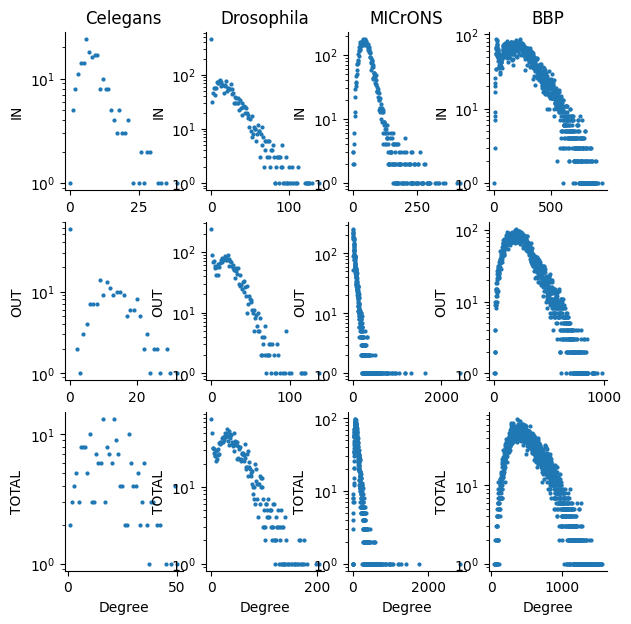

In [3]:
fig, axs = plt.subplots(3,4, figsize=(7,7))
for i,conn in enumerate(["Celegans", "Drosophila", "MICrONS", "BBP"]):
#for i,conn in enumerate(["Celegans"]):
    axs[0,i].set_title(conn)
    axs[0,i].set_ylabel("IN")
    axs[1,i].set_ylabel("OUT")
    axs[2,i].set_ylabel("TOTAL")
    axs[-1,i].set_xlabel("Degree")
    _=axs[0,i].plot(degs[conn]["IN"].value_counts().sort_index(),linestyle="", marker="o", ms=2)
    _=axs[1,i].plot(degs[conn]["OUT"].value_counts().sort_index(),linestyle="", marker="o", ms=2)
    _=axs[2,i].plot((degs[conn]["IN"]+degs[conn]["OUT"]).value_counts().sort_index(),linestyle="", marker="o", ms=2)

for ax in axs.flatten(): 
    ax.spines[["top", "right"]].set_visible(False)
    #ax.set_xscale("log")
    ax.set_yscale("log")
    

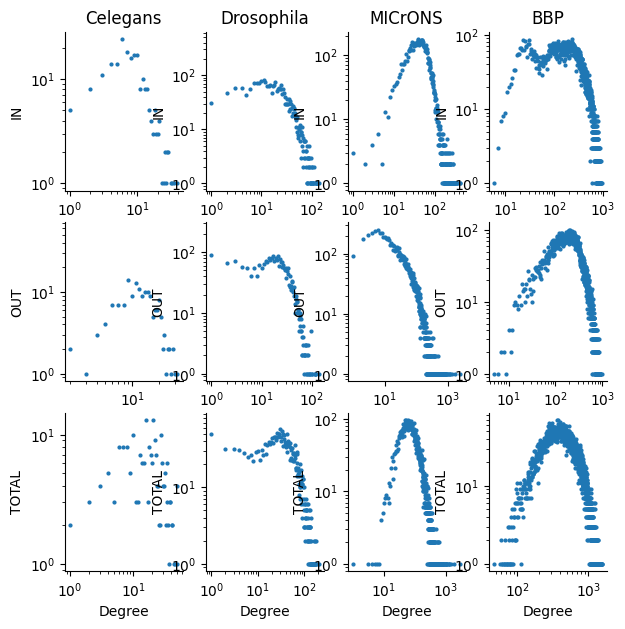

In [4]:
fig, axs = plt.subplots(3,4, figsize=(7,7))
for i,conn in enumerate(["Celegans", "Drosophila", "MICrONS", "BBP"]):
#for i,conn in enumerate(["Celegans"]):
    axs[0,i].set_title(conn)
    axs[0,i].set_ylabel("IN")
    axs[1,i].set_ylabel("OUT")
    axs[2,i].set_ylabel("TOTAL")
    axs[-1,i].set_xlabel("Degree")
    _=axs[0,i].plot(degs[conn]["IN"].value_counts().sort_index(),linestyle="", marker="o", ms=2)
    _=axs[1,i].plot(degs[conn]["OUT"].value_counts().sort_index(),linestyle="", marker="o", ms=2)
    _=axs[2,i].plot((degs[conn]["IN"]+degs[conn]["OUT"]).value_counts().sort_index(),linestyle="", marker="o", ms=2)

for ax in axs.flatten(): 
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_xscale("log")
    ax.set_yscale("log")
    

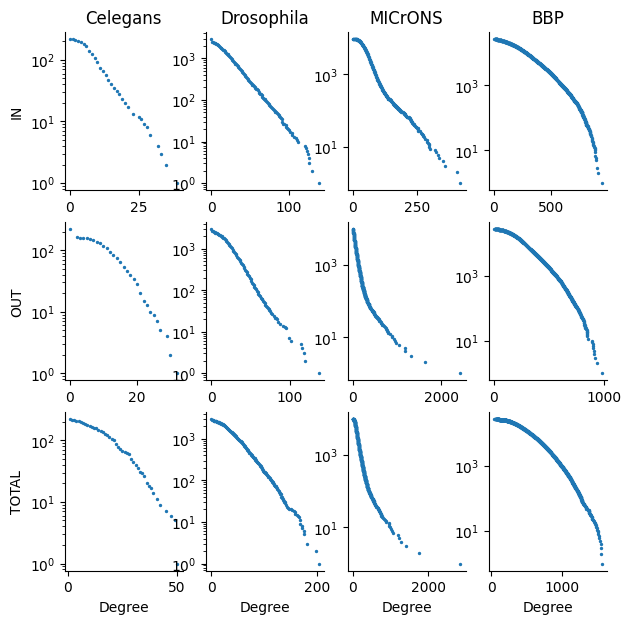

In [5]:
fig, axs = plt.subplots(3,4, figsize=(7,7))
for i,conn in enumerate(["Celegans", "Drosophila", "MICrONS", "BBP"]):
#for i,conn in enumerate(["Celegans"]):
    axs[0,i].set_title(conn)
    axs[0,0].set_ylabel("IN")
    axs[1,0].set_ylabel("OUT")
    axs[2,0].set_ylabel("TOTAL")
    axs[-1,i].set_xlabel("Degree")
    for j, dtype in enumerate(["IN", "OUT"]):
        df=degs[conn][dtype].value_counts().sort_index(ascending=False).cumsum() 
        _=axs[j,i].scatter(df.index, df.values, marker="o", s=2)
    j=2
    df=(degs[conn]["IN"]+degs[conn]["OUT"]).value_counts().sort_index(ascending=False).cumsum()
    _=axs[j,i].scatter(df.index, df.values, marker="o", s=2)

for ax in axs.flatten(): 
    ax.spines[["top", "right"]].set_visible(False)
    #ax.set_xscale("log")
    ax.set_yscale("log")
    

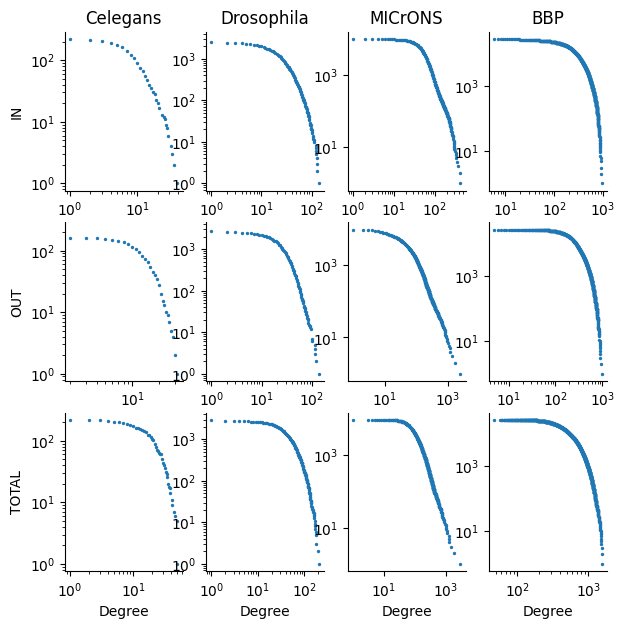

In [6]:
fig, axs = plt.subplots(3,4, figsize=(7,7))
for i,conn in enumerate(["Celegans", "Drosophila", "MICrONS", "BBP"]):
#for i,conn in enumerate(["Celegans"]):
    axs[0,i].set_title(conn)
    axs[0,0].set_ylabel("IN")
    axs[1,0].set_ylabel("OUT")
    axs[2,0].set_ylabel("TOTAL")
    axs[-1,i].set_xlabel("Degree")
    for j, dtype in enumerate(["IN", "OUT"]):
        df=degs[conn][dtype].value_counts().sort_index(ascending=False).cumsum() 
        _=axs[j,i].scatter(df.index, df.values, marker="o", s=2)
    j=2
    df=(degs[conn]["IN"]+degs[conn]["OUT"]).value_counts().sort_index(ascending=False).cumsum()
    _=axs[j,i].scatter(df.index, df.values, marker="o", s=2)

for ax in axs.flatten(): 
    ax.spines[["top", "right"]].set_visible(False)
    ax.set_xscale("log")
    ax.set_yscale("log")